In [1]:
import os

import pandas as pd
import numpy as np

from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [2]:
ranks = {}
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [3]:
df = pd.read_csv("../datasets/Airbnb_price/data_Airbnb_preprocessed.csv", sep=';')
df.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,0,0,152,3,1.0,4,2,1,4,1,1,0,40.696524,-73.991617,2,100.0,1.0,1.0
1,5.129899,0,0,218,7,1.0,4,2,1,4,1,0,1,40.766115,-73.989040,6,93.0,3.0,3.0
2,4.976734,0,0,311,5,1.0,4,1,1,4,1,1,1,40.808110,-73.943756,10,92.0,1.0,3.0
3,6.620073,17,0,210,4,1.0,4,0,1,5,1,1,0,37.772004,-122.431619,0,0.0,2.0,2.0
4,4.744932,0,0,174,2,1.0,4,1,1,2,1,1,1,38.925627,-77.034596,4,40.0,0.0,1.0


In [4]:
X = df.copy()
y = X.pop("log_price")
colnames_car = X.columns
colnames = X.columns

In [5]:
model = DecisionTreeRegressor()
model.fit(X, y)

DecisionTreeRegressor()

Feature: 0, Score: 0.01652
Feature: 1, Score: 0.37362
Feature: 2, Score: 0.05832
Feature: 3, Score: 0.03575
Feature: 4, Score: 0.12061
Feature: 5, Score: 0.00304
Feature: 6, Score: 0.01172
Feature: 7, Score: 0.00735
Feature: 8, Score: 0.00608
Feature: 9, Score: 0.00102
Feature: 10, Score: 0.00609
Feature: 11, Score: 0.00641
Feature: 12, Score: 0.11916
Feature: 13, Score: 0.13744
Feature: 14, Score: 0.03988
Feature: 15, Score: 0.02035
Feature: 16, Score: 0.02684
Feature: 17, Score: 0.00980


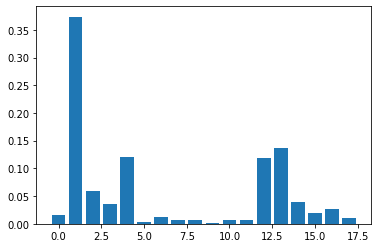

In [6]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [7]:
cart = DecisionTreeRegressor()
cart.fit(X,y)
ranks["CART"] = ranking(cart.feature_importances_, colnames);
ranks

{'CART': {'property_type': 0.04,
  'room_type': 1.0,
  'amenities': 0.15,
  'accommodates': 0.09,
  'bathrooms': 0.32,
  'bed_type': 0.01,
  'cancellation_policy': 0.03,
  'cleaning_fee': 0.02,
  'city': 0.01,
  'host_has_profile_pic': 0.0,
  'host_identity_verified': 0.01,
  'instant_bookable': 0.01,
  'latitude': 0.32,
  'longitude': 0.37,
  'number_of_reviews': 0.1,
  'review_scores_rating': 0.05,
  'bedrooms': 0.07,
  'beds': 0.02}}

In [8]:
decimalrank_df = pd.DataFrame()

# Join preranks in dataframe
for method_name, rank_list in ranks.items():
    df_Temp = pd.DataFrame(data = {method_name:pd.Series(rank_list)})
    decimalrank_df = pd.concat([decimalrank_df,df_Temp ], axis=1)

rank_df = pd.DataFrame()
# Create new integer ranks
for method_name, rank_list in ranks.items():
    rank_df[method_name] = decimalrank_df[method_name].rank(ascending=False)

rank_df['feature_name'] = rank_df.index

In [9]:
ranksout = rank_df.melt(id_vars = 'feature_name', var_name='method', value_name='feature_rank')
ranksout['dataset'] = 'Airbnb_price'
ranksout

,feature_name,method,feature_rank,dataset
0,property_type,CART,10.0,Airbnb_price
1,room_type,CART,1.0,Airbnb_price
2,amenities,CART,5.0,Airbnb_price
3,accommodates,CART,7.0,Airbnb_price
4,bathrooms,CART,3.5,Airbnb_price
5,bed_type,CART,15.5,Airbnb_price
6,cancellation_policy,CART,11.0,Airbnb_price
7,cleaning_fee,CART,12.5,Airbnb_price
8,city,CART,15.5,Airbnb_price
9,host_has_profile_pic,CART,18.0,Airbnb_price


In [10]:
ranksout.to_csv('../data/CART/airbnb_featureranks_CART.csv', sep=';',index=False)